In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report 

In [6]:
df = pd.read_csv("diamonds.csv")

In [7]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [12]:
df.shape

(53940, 10)

In [23]:
df.isna()
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [25]:
df['price'] = df['price'].astype(float) 
df['cut'] = df['cut'].astype('category') 
df['color'] = df['color'].astype('category') 
df['clarity'] = df['clarity'].astype('category') 
df['carat'] = df['carat'].astype(float)

In [31]:
le = LabelEncoder() # Encode 'cut', 'color', and 'clarity' columns 
df['cut'] = le.fit_transform(df['cut']) 
df['color'] = le.fit_transform(df['color']) 
df['clarity'] = le.fit_transform(df['clarity']) 
# Check the first few rows to see the encoded columns 
print(df.head())

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0  335.0  4.34  4.35  2.75


C:\Users\naage\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


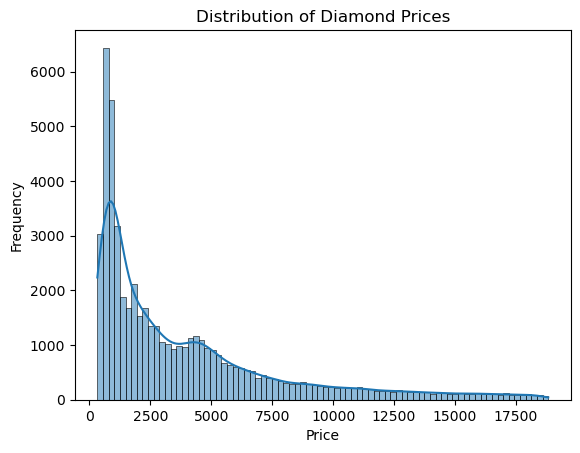

C:\Users\naage\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


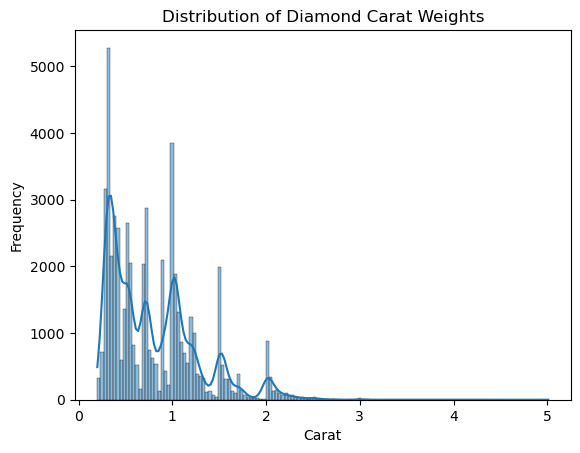

In [33]:
# Distribution of Price
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of Carat
sns.histplot(df['carat'], kde=True)
plt.title('Distribution of Diamond Carat Weights')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()


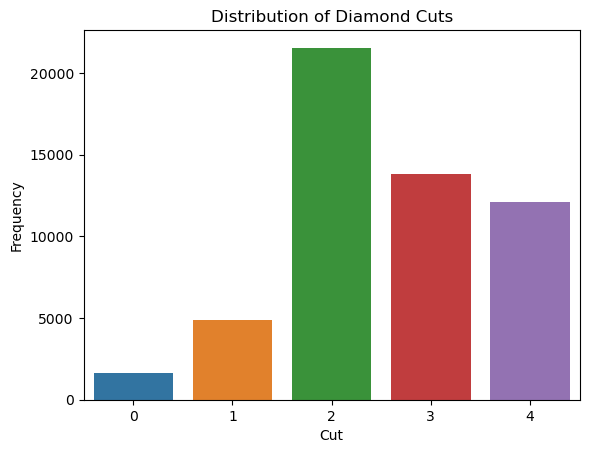

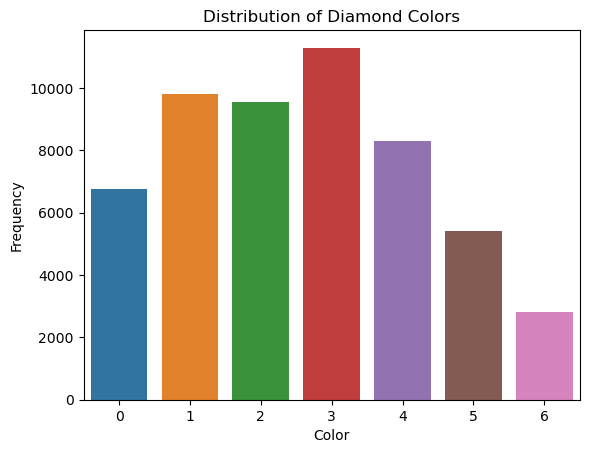

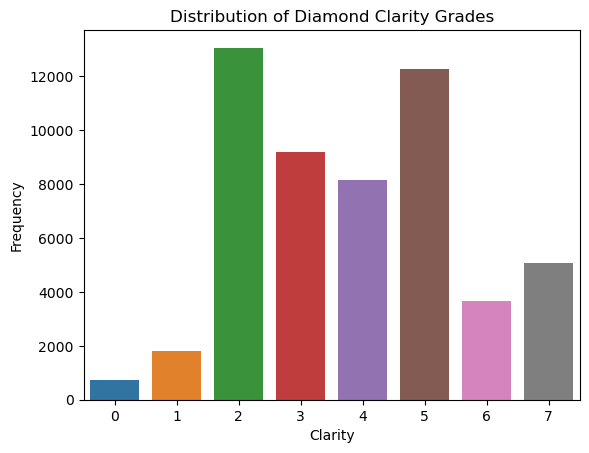

In [34]:
# Distribution of Cut
sns.countplot(x=df['cut'])
plt.title('Distribution of Diamond Cuts')
plt.xlabel('Cut')
plt.ylabel('Frequency')
plt.show()

# Distribution of Color
sns.countplot(x=df['color'])
plt.title('Distribution of Diamond Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.show()

# Distribution of Clarity
sns.countplot(x=df['clarity'])
plt.title('Distribution of Diamond Clarity Grades')
plt.xlabel('Clarity')
plt.ylabel('Frequency')
plt.show()

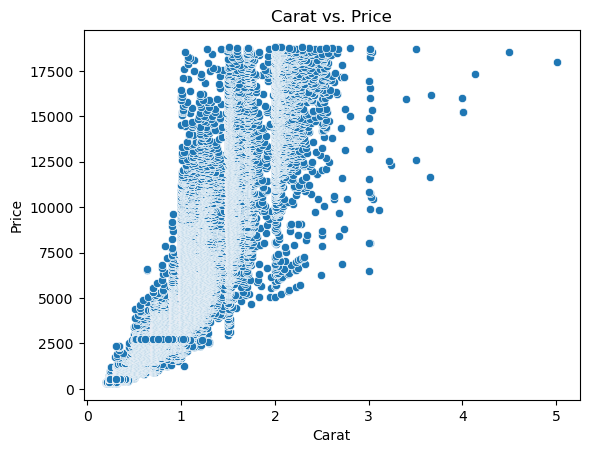

In [35]:
sns.scatterplot(x=df['carat'], y=df['price'])
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

C:\Users\naage\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naage\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naage\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naage\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

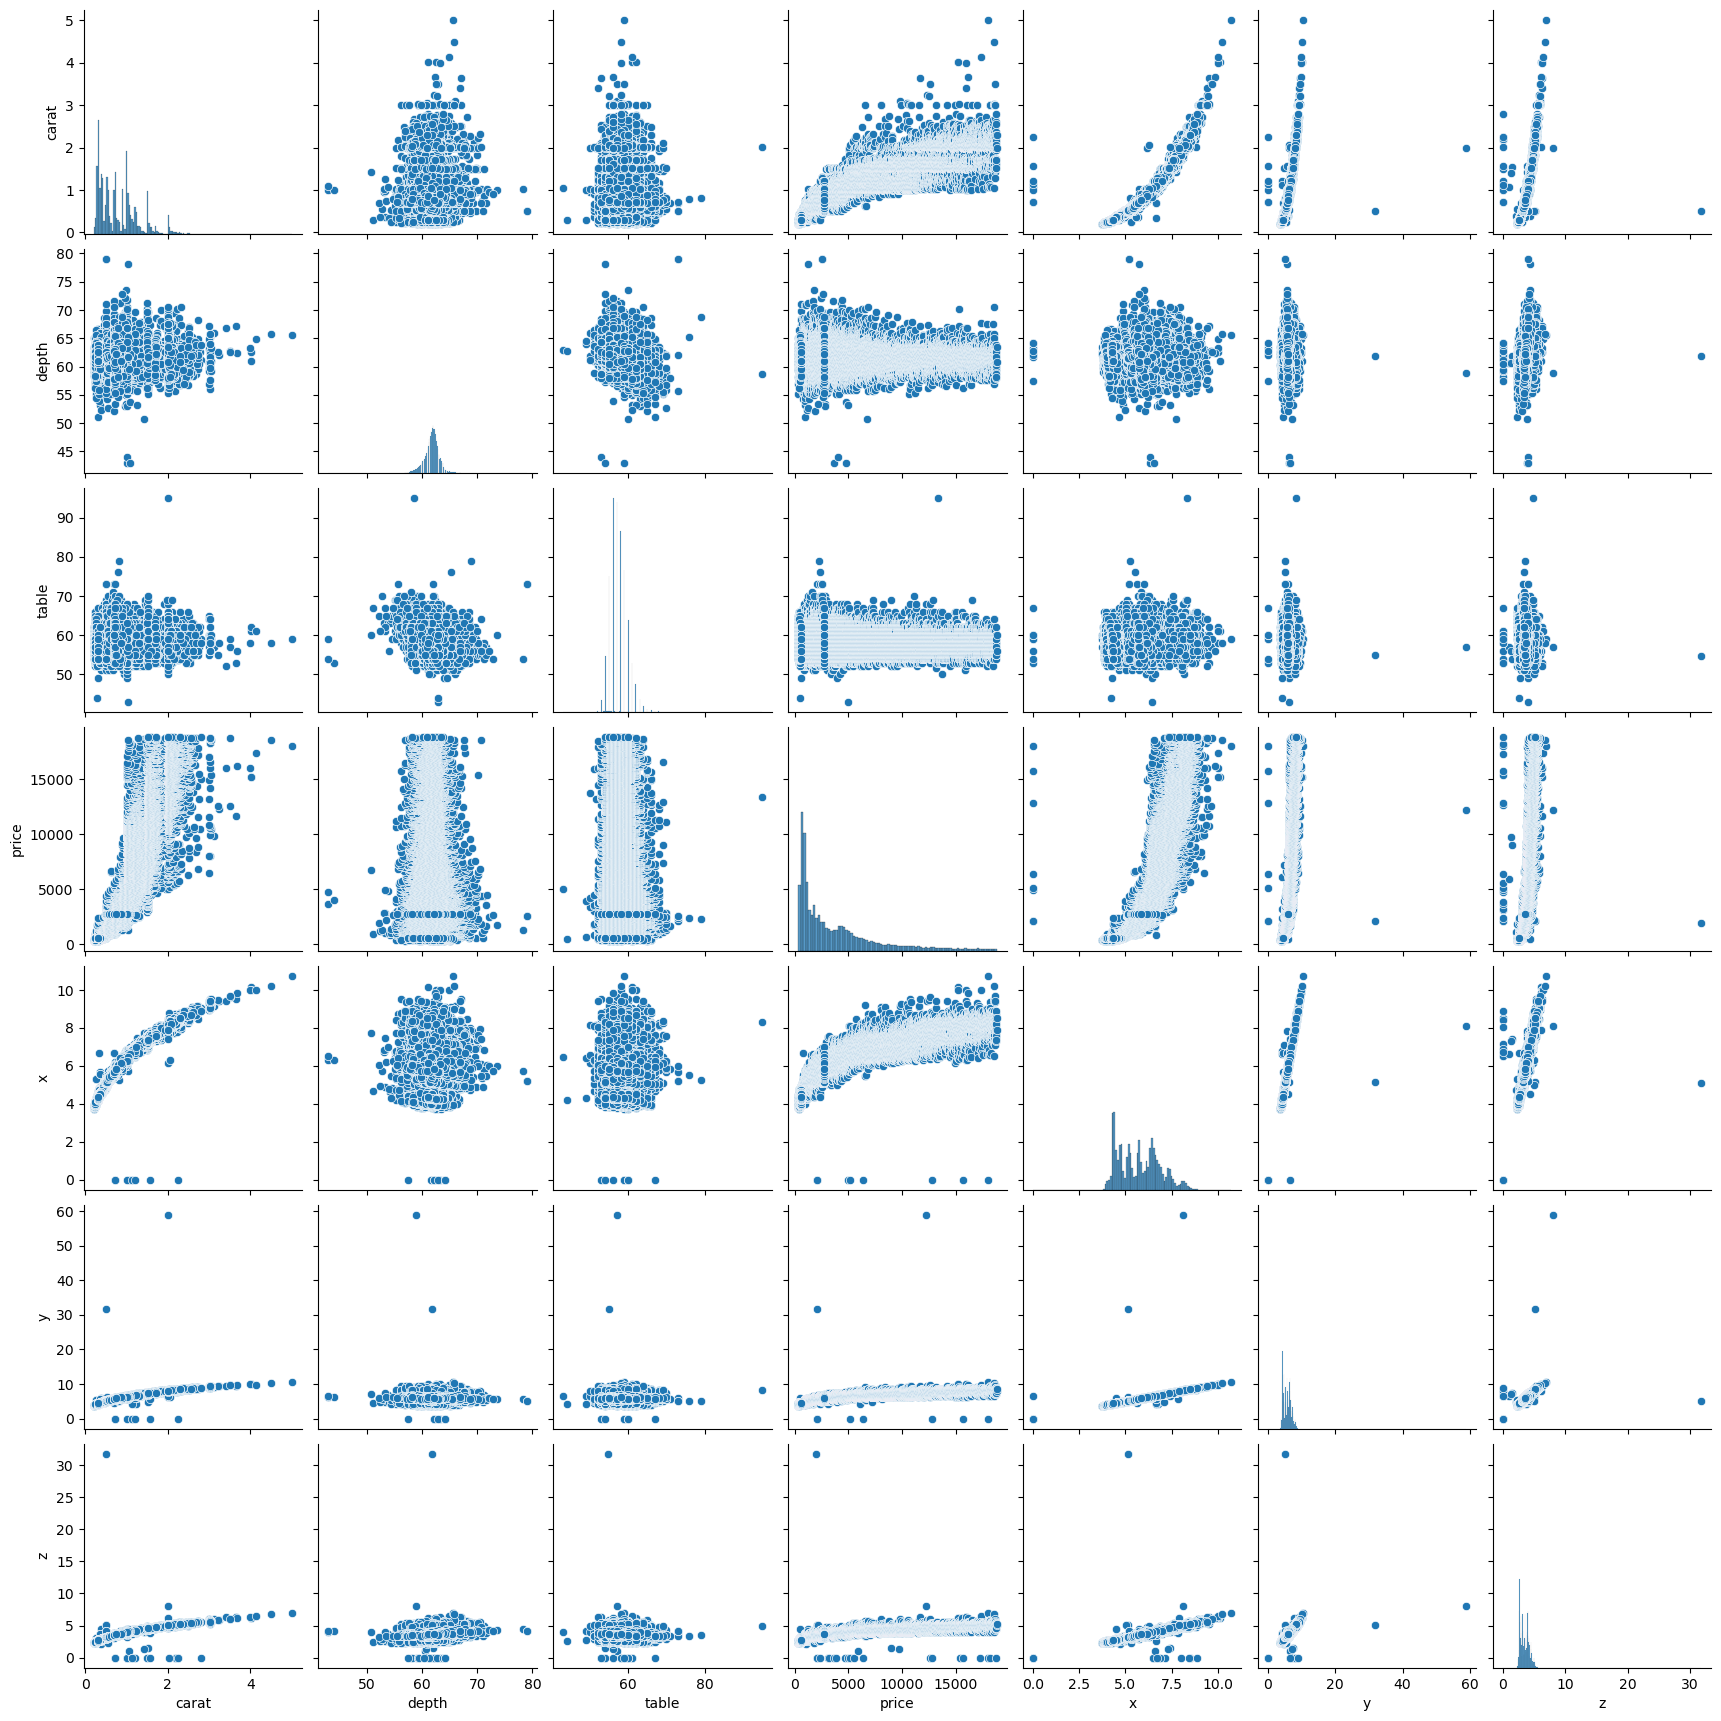

In [36]:
sns.pairplot(df, vars=['carat', 'depth', 'table', 'price', 'x', 'y', 'z'])
plt.show()

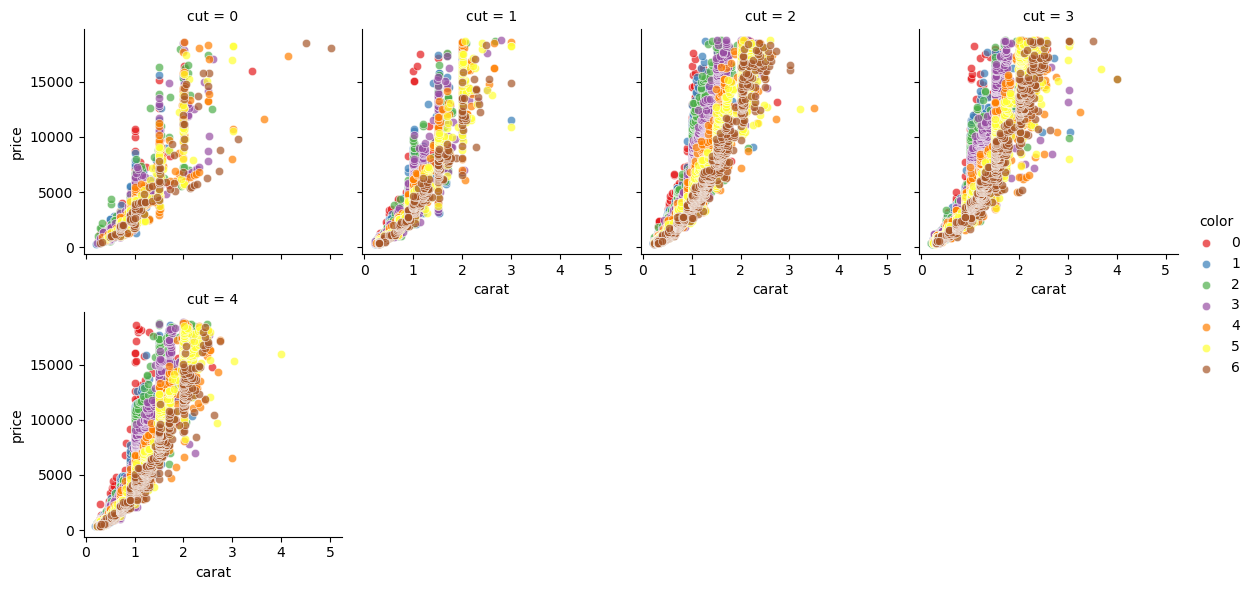

In [37]:
g = sns.FacetGrid(df, col="cut", hue="color", palette="Set1", col_wrap=4)
g.map(sns.scatterplot, 'carat', 'price', alpha=.7)
g.add_legend()
plt.show()

In [38]:
Y = df["cut"]
X = df.drop(columns = ["cut"])

In [39]:
X

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,6,3,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,0,2,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,4,3,61.0,58.0,2757.0,6.15,6.12,3.74


In [40]:
Y

0        2
1        3
2        1
3        3
4        1
        ..
53935    2
53936    1
53937    4
53938    3
53939    2
Name: cut, Length: 53940, dtype: int32

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [49]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
# Initialize the model 
logistic_model = LogisticRegression(max_iter=1000) 
# Train the model 
logistic_model.fit(X_train, Y_train) 
# Make predictions 
Y_pred = logistic_model.predict(X_test)

In [56]:
# Evaluate Logistic Regression 
print("Logistic Regression Performance:") 
print(f'Accuracy: {accuracy_score(Y_test, Y_pred)}') 
print(f'Precision: {precision_score(Y_test, Y_pred, average="weighted")}') 
print(f'Recall: {recall_score(Y_test, Y_pred, average="weighted")}') 
print(f'F1-Score: {f1_score(Y_test, Y_pred, average="weighted")}') 
print(classification_report(Y_test, Y_pred))

Logistic Regression Performance:
Accuracy: 0.6549499443826474
Precision: 0.6399177601041822
Recall: 0.6549499443826474
F1-Score: 0.6285807830356968
              precision    recall  f1-score   support

           0       0.76      0.48      0.59       427
           1       0.58      0.12      0.20      1260
           2       0.72      0.88      0.79      5369
           3       0.65      0.72      0.68      3447
           4       0.49      0.42      0.46      2982

    accuracy                           0.65     13485
   macro avg       0.64      0.53      0.54     13485
weighted avg       0.64      0.65      0.63     13485

